# Dataset importation

At first, we import the dataset in csv format and perform an essential exploration of its features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('CrowdstormingDataJuly1st.csv')
data.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


# Preliminary analysis -  NaN indentification

The complete description of the dataset can be found [here](https://github.com/ADAEPFL/Homework/blob/master/04%20-%20Applied%20ML/DATA.md). Since our purpose is to train a ML model to predict the skin colour from the player's description, we perform an essential qualitative analysis to understand the features of the dataset.
Above all, we take a look at the skin colour distribution, which is described by the attributes *rater1* and *rater2*.

In [3]:
# NaN identification
nans = [data.rater1.isnull().value_counts(),data.rater2.isnull().value_counts() ]
nans

[False    124621
 True      21407
 Name: rater1, dtype: int64, False    124621
 True      21407
 Name: rater2, dtype: int64]

There is a proportion of **14.7%** of NaN values. We notice that the NaN values affect the same players both for the attribute *rater1* and for *rater2*:

In [4]:
(data.rater1.isnull()==data.rater2.isnull()).value_counts()

True    146028
dtype: int64

Therefore, there are players for which the attribute *skin color* cannot be predicted directly from the dataset. Since this is the feature we want to study, we throw away the missing values:

In [5]:
data.dropna(axis=0, subset=['rater1'],inplace=True)

# Preliminary analysis - qualitative overlook

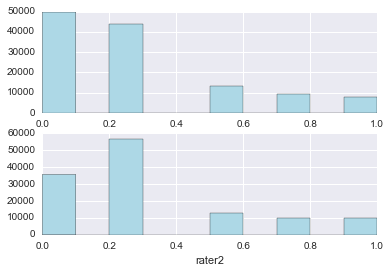

In [6]:
plt.subplot(2,1,1)
plt.hist(data.rater1,color='lightblue')
plt.xlabel('rater1')
plt.subplot(2,1,2)
plt.hist(data.rater2,color='lightblue')
plt.xlabel('rater2')

The two ratings are actually different, due to a subjective evaluation of the skin color. We plot now their difference:

(array([ 95714.,      0.,      0.,      0.,      0.,  28743.,      0.,
             0.,      0.,    164.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ]),
 <a list of 10 Patch objects>)

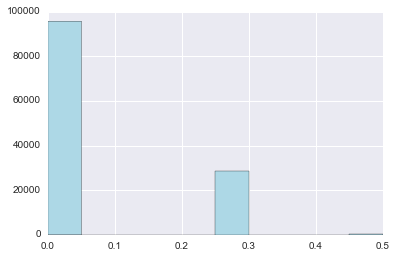

In [7]:
plt.hist(abs(data.rater2-data.rater1),color='lightblue',bins=10)

As it appears from the histogram, there are 3 observed values (0, 0.25 and 0.5) for the rating's difference in absolute value (which of course depends on the quantization of the skin color into categories). This shows that the sensibility of the evaluators may differ for at most 0.5. The proportions of rating's differences out of the total amount of players is summed-up below:

In [8]:
abs(data.rater2-data.rater1).value_counts()/len(data)*100

0.00    76.804070
0.25    23.064331
0.50     0.131599
dtype: float64

The proportions for the signed difference are instead given by:

In [9]:
(data.rater2-data.rater1).value_counts()/len(data)*100

 0.00    76.804070
 0.25    19.121978
-0.25     3.942353
 0.50     0.131599
dtype: float64

We observe that the second rater has a systematic higher perception of the skin colour with respect to the first one. For our analysis purposes, we define a new attribute ***skinColor*** as the mean of the two evaluations. This will be the quantity we want to predict:

In [10]:
data['skinColor']=0.5*(data.rater1+data.rater2)
data.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skinColor
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000


# Analysis of features

Let us now begin the real analysis of the dataset. Before applying any machine learning algorithm, we visualize the interactions between some feature we think are more significant than others for our purposes:
- leagueCountry
- height
- weight
- position
- skinColor (mean of the ratings, previously defined)

The first step is to figure out the skin color distribution across the population:

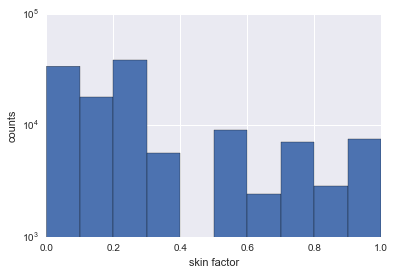

In [65]:
plt.hist(data.skinColor)
plt.gca().set_xlabel('skin factor')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

The gap between 0.4 and 0.5 is probably due to the applied quantization criterion (mean of the two ratings) and the values of *rater1* and *rater2*. As one could imagine, in the European Leagues there are more white-race players than black-race ones (the difference is for at least one order of magnitude).

In [11]:
# quantize the parameter leagueCountry: 0 - England, 1 - France, 2 - Germany, 3 - Spain
leagueToNum = {'England' : 0, 'France' : 1, 'Germany' : 2, 'Spain' : 3}
league = []
for i in data.leagueCountry:
    league.append(leagueToNum[i])
data['leagueID']=league

Skin color - height:

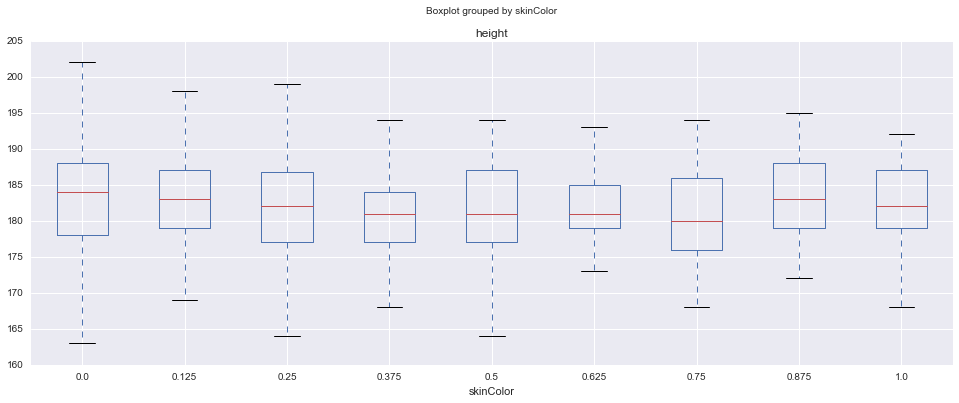

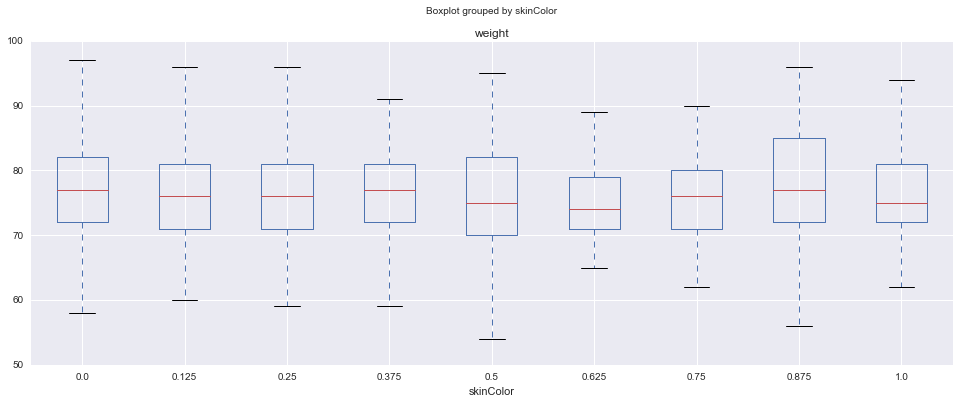

In [12]:
data.boxplot(by='skinColor',column='height',figsize=(16,6))
data.boxplot(by='skinColor',column='weight',figsize=(16,6))

Height - weight interaction grouped by skin:

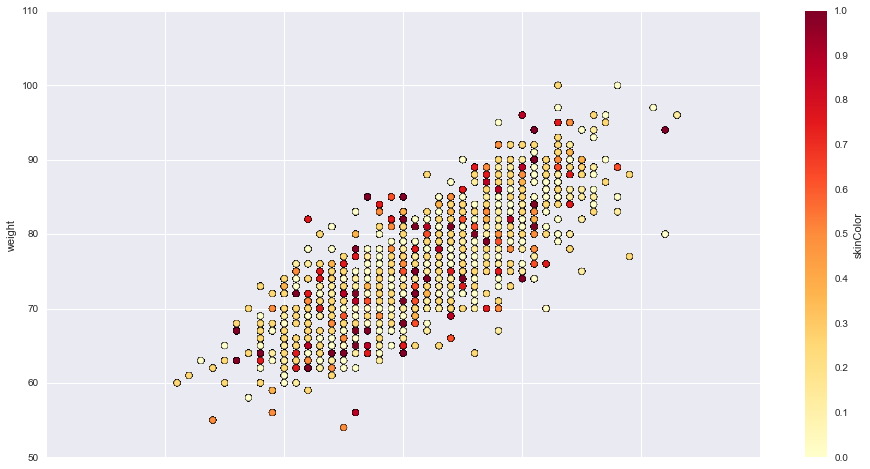

In [45]:
data.plot(kind='scatter',x = 'height', y='weight', c = 'skinColor', s=40, cmap = 'YlOrRd',figsize=(16,8))

From these first plot, we can observe that:
1. Height seems to be more variable for white-race players than for black-race ones;
2. Weight and skin color seem less correlated, because the distribution is more uniform than for height;
3. There is a clear correlation between height and weight, independently on the skin color. This relation may be well approximated by a linear regression straight line, but the variance of the sample is anyway quite high.
These results are very reasonable on a qualitative point of view; in particular, we expect that height would be a more discriminant feature for the skin color than the other two considered parameters.

Let us now examine the behaviour with respect to the *leagueID* parameter (which is a numerical translation of the Country name):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B53E7B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D2A8278>]], dtype=object)

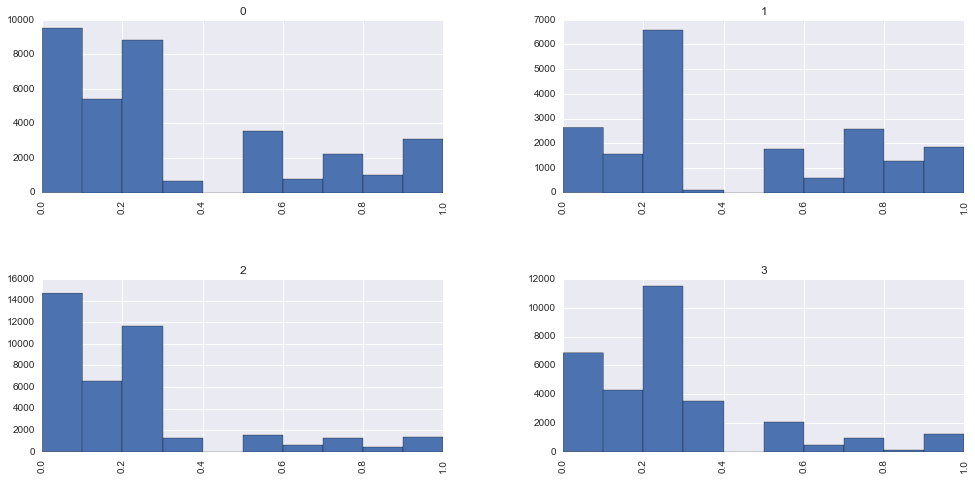

In [13]:
data.hist(column = 'skinColor', by = 'leagueID', figsize=(16,8))

Also in this case we obtain reasonable results:
- **England** and **Germany** show a higher white-race (Viking) component;
- **England** and **France** show a higher black-race component, since traditionally these countries have had a more significant immigration rate from African Countries;
- **Spain** and **France** have a higher "middle race" component, coming probably from the Latin races.

We try now to merge these information into one bigger scatterplot, where we look at weight vs. height and depict as the markers' size the skin color and with colors the league Country (try to comment some lines of the scatterplot to visualize fewer Countries):

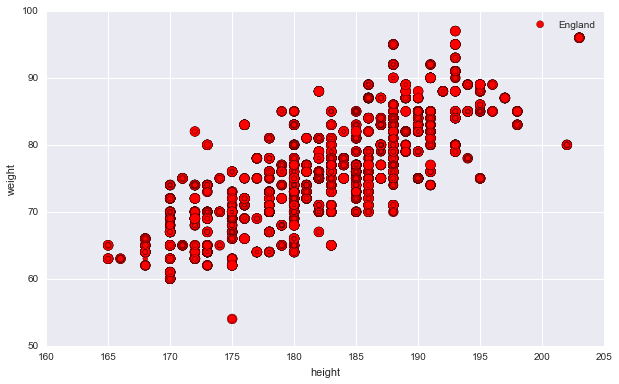

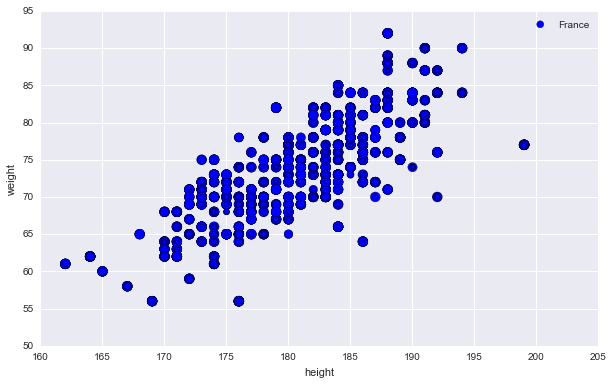

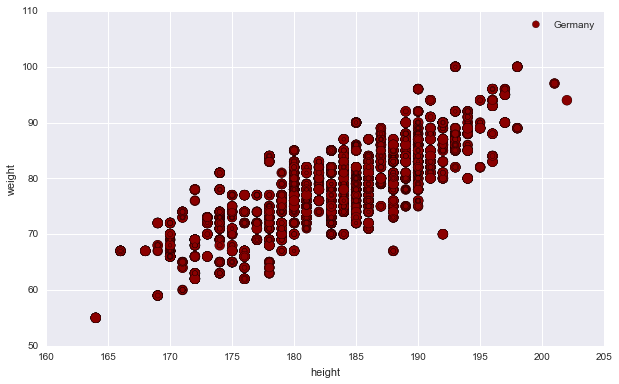

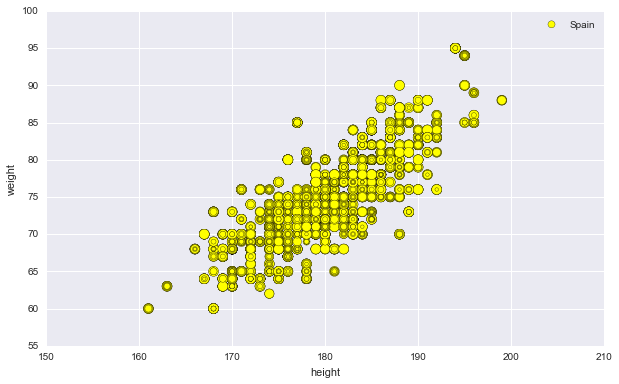

In [20]:
data[data.leagueID==0].plot(kind='scatter',x = 'height', y='weight', s=data['skinColor']*100, color='red',figsize=(10,6),label='England')
data[data.leagueID==1].plot(kind='scatter',x = 'height', y='weight', s=data['skinColor']*100, color='blue',figsize=(10,6),label='France')
data[data.leagueID==2].plot(kind='scatter',x = 'height', y='weight', s=data['skinColor']*100, color='darkred',figsize=(10,6),label='Germany')
data[data.leagueID==3].plot(kind='scatter',x = 'height', y='weight', s=data['skinColor']*100, color='yellow',figsize=(10,6),label='Spain')

This kind of visualization can let us appreciate the differences among the 4 considered Nations in terms of relationships weight-height-Country, but they do not bring out sufficiently clearly the skin color. Let us try to set a representation threshold to identify patterns:

C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


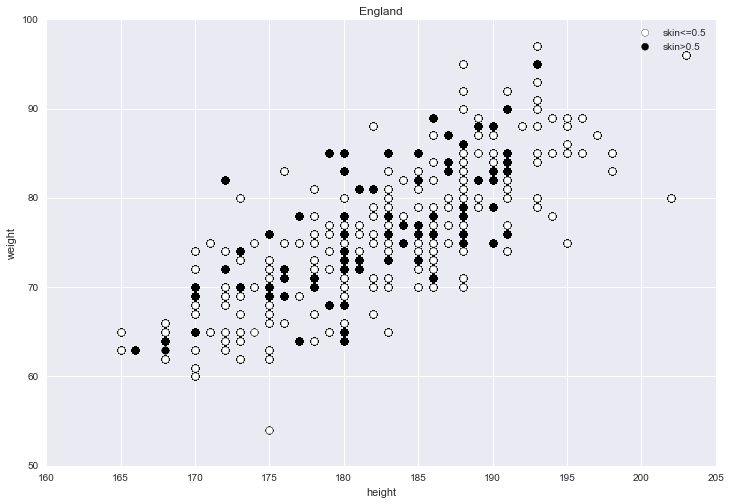

In [45]:
subdata = data[data.leagueID==0] # England
ax = subdata[data.skinColor <= 0.5].plot(kind='scatter',x = 'height', y='weight', s = 50,figsize=(12,8), color='white',label='skin<=0.5',title='England')
subdata[data.skinColor > 0.5].plot(kind='scatter',x = 'height', y='weight', s = 50, color='black',label='skin>0.5',ax=ax)

C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


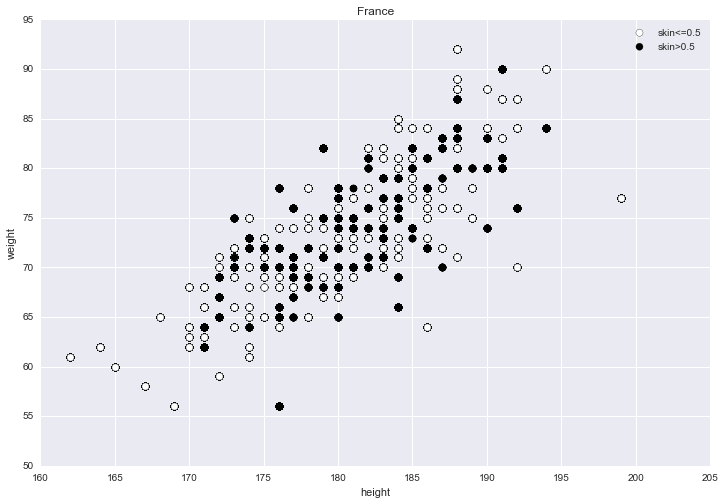

In [46]:
subdata = data[data.leagueID==1] # France
ax = subdata[data.skinColor <= 0.5].plot(kind='scatter',x = 'height', y='weight', s = 50,figsize=(12,8), color='white',label='skin<=0.5',title='France')
subdata[data.skinColor > 0.5].plot(kind='scatter',x = 'height', y='weight', s = 50, color='black',label='skin>0.5',ax=ax)

C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


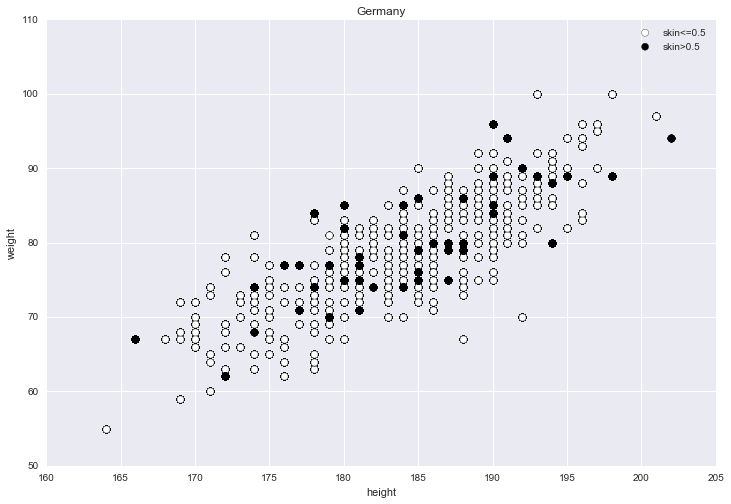

In [47]:
subdata = data[data.leagueID==2] # Germany
ax = subdata[data.skinColor <= 0.5].plot(kind='scatter',x = 'height', y='weight', s = 50,figsize=(12,8), color='white',label='skin<=0.5',title='Germany')
subdata[data.skinColor > 0.5].plot(kind='scatter',x = 'height', y='weight', s = 50, color='black',label='skin>0.5',ax=ax)

C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


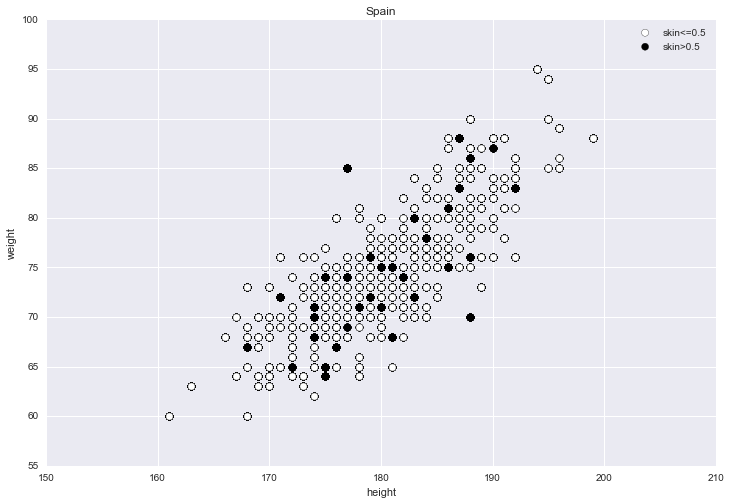

In [48]:
subdata = data[data.leagueID==3] # Spain
ax = subdata[data.skinColor <= 0.5].plot(kind='scatter',x = 'height', y='weight', s = 50,figsize=(12,8), color='white',label='skin<=0.5',title='Spain')
subdata[data.skinColor > 0.5].plot(kind='scatter',x = 'height', y='weight', s = 50, color='black',label='skin>0.5',ax=ax)

Going on with this explorative analysis, we visualize the number of yellow cards assigned by the referees to the players as a function of the player's skin color; if there is a qualitatively significant difference between white-race and black-race players, then we expect a significative role played by the referee features of the dataframe in predicting the skin color. We start from the yellow cards, as they are more likely to be assigned during a match (and then may have a more powerful predictive power, because they might bring out systematic trends).

In [50]:
# verify the eventual presence of NaN values
data.yellowCards.isnull().value_counts()

False    124621
Name: yellowCards, dtype: int64

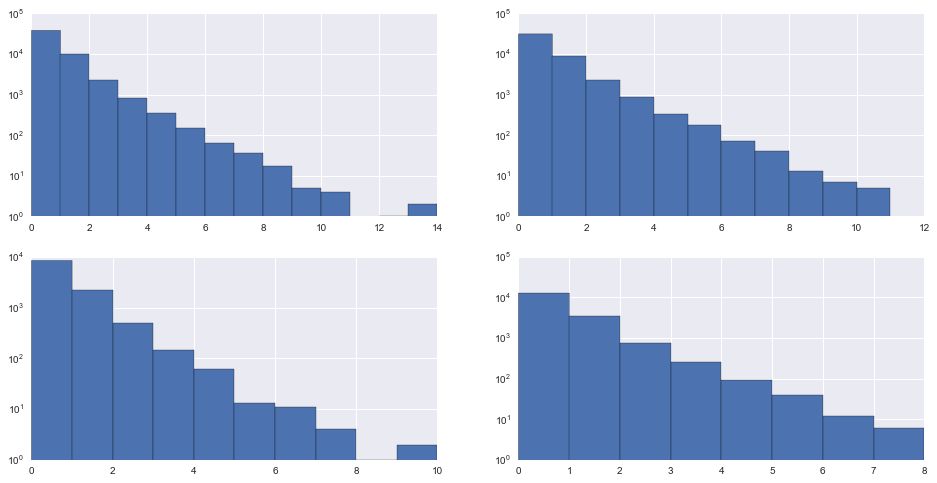

In [14]:
# for simplicity, we divide the skin attribute into 4 classes
plt.subplot(2,2,1)
plt.hist(data[data.skinColor < 0.25].yellowCards,bins=max(data[data.skinColor < 0.25].yellowCards))
plt.gca().set_yscale('log')
plt.subplot(2,2,2)
plt.hist(data[(0.25 <= data.skinColor) & (data.skinColor < 0.5)].yellowCards,bins=max(data[(0.25 <= data.skinColor) & (data.skinColor < 0.5)].yellowCards))
plt.gca().set_yscale('log')
plt.subplot(2,2,3)
plt.hist(data[(0.5 <= data.skinColor) & (data.skinColor < 0.75)].yellowCards,bins=max(data[(0.5 <= data.skinColor) & (data.skinColor < 0.75)].yellowCards))
plt.gca().set_yscale('log')
plt.subplot(2,2,4)
plt.hist(data[data.skinColor >= 0.75].yellowCards,bins=max(data[data.skinColor >= 0.75].yellowCards))
plt.gca().set_yscale('log')
plt.gcf().set_size_inches(16,8)

We notice here a very interesting fact: it seems that the number of yellow cards is **decreasing** with the skin color rating, that is, white-race players are likely to receive more yellow cards than black-race ones. The plots for the yellow-red cards and the red cards can be generated in the same way, but are statistically less significant, since they represent rarer events during a match.

We want now to figure out if there is some interesting behaviour of the *birthday* parameter (in particular, we are interested in the year of birth). In general age and race are supposed to be totally independent; let us verify if in this case the distribution of the age changes with the skin color (that is, black-race players are younger, e.g.):

In [19]:
data.birthday.isnull().value_counts() #good, all the dates are available

False    124621
Name: birthday, dtype: int64

In [29]:
# compute the age from the year of birth
age = []
for date in data.birthday:
    age.append(2016-int(date[6:11]))

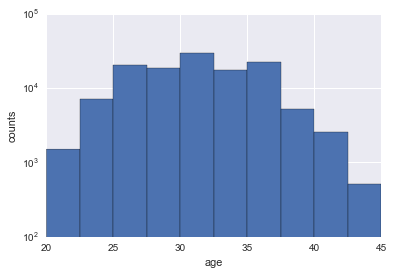

In [40]:
plt.hist(age)
plt.gca().set_xlabel('age')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

The age distribution is symmetric; let us see if there are differences in terms of skin color:

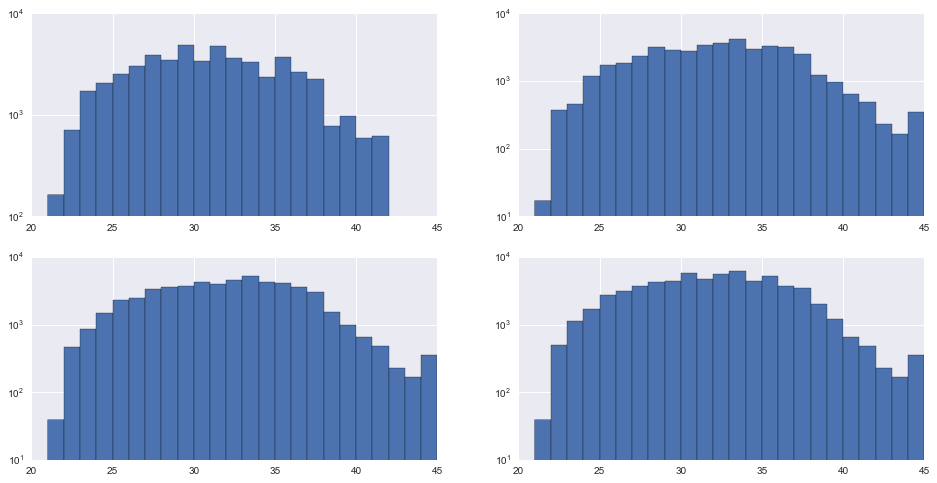

In [41]:
# for simplicity, we divide the skin attribute into 4 classes
plt.subplot(2,2,1)
age = []
for date in data[data.skinColor < 0.25].birthday:
    age.append(2016-int(date[6:11]))
plt.hist(age,bins=max(age)-min(age))
plt.gca().set_yscale('log')

plt.subplot(2,2,2)
age = []
for date in data[(0.25 <= data.skinColor) & (data.skinColor < 0.5)].birthday:
    age.append(2016-int(date[6:11]))
plt.hist(age,bins=max(age)-min(age))
plt.gca().set_yscale('log')

plt.subplot(2,2,3)
for date in data[(0.5 <= data.skinColor) & (data.skinColor < 0.75)].birthday:
    age.append(2016-int(date[6:11]))
plt.hist(age,bins=max(age)-min(age))
plt.gca().set_yscale('log')

plt.subplot(2,2,4)
for date in data[data.skinColor > 0.75].birthday:
    age.append(2016-int(date[6:11]))
plt.hist(age,bins=max(age)-min(age))
plt.gca().set_yscale('log')

plt.gcf().set_size_inches(16,8)

The expectations are globally confirmed: the **age** distribution seems **independent on the skin color**, except for a minor presence of "oldest players" among the white-race ones. We think that this fact is not crucial for the general conclusion. This observation might lead us to *discard the age feature* when determining the best Random Forest classifier.

The other features of the dataset concern on one hand the matches statistics (goals, victories, defeats etc.), and on the other one some statistical information about the referee (Country, implicit and explicit association tests). We take a quick look at these properties of the dataset, beginning with some match stats:

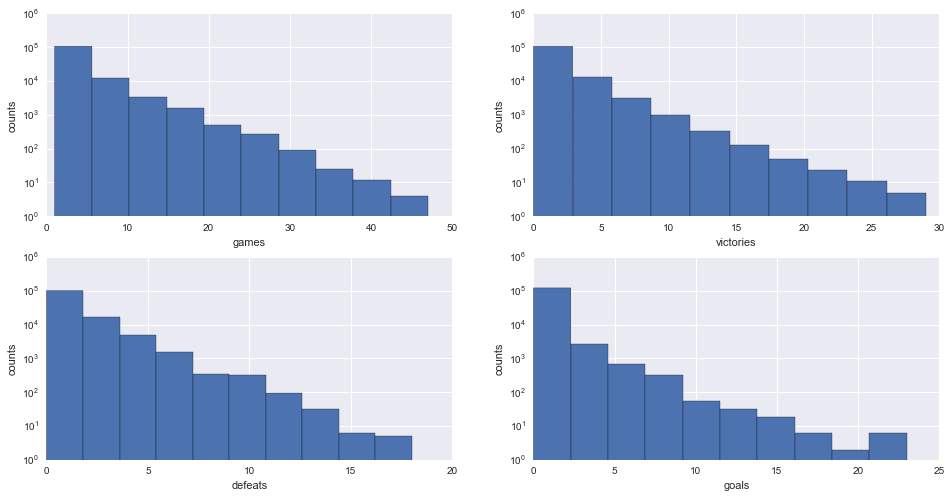

In [55]:
plt.subplot(2,2,1)
plt.hist(data.games)
plt.gca().set_xlabel('games')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.subplot(2,2,2)
plt.hist(data.victories)
plt.gca().set_xlabel('victories')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.subplot(2,2,3)
plt.hist(data.defeats)
plt.gca().set_xlabel('defeats')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.subplot(2,2,4)
plt.hist(data.goals)
plt.gca().set_xlabel('goals')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.gcf().set_size_inches(16,8)

As one could expect, match statistics are **scale-invariant** (that is, they follow a *power-law*). Let us consider only 2 classes for the skin color, for the only sake of brevity (<= or > 0.5) . Let us plot the resulting stats:

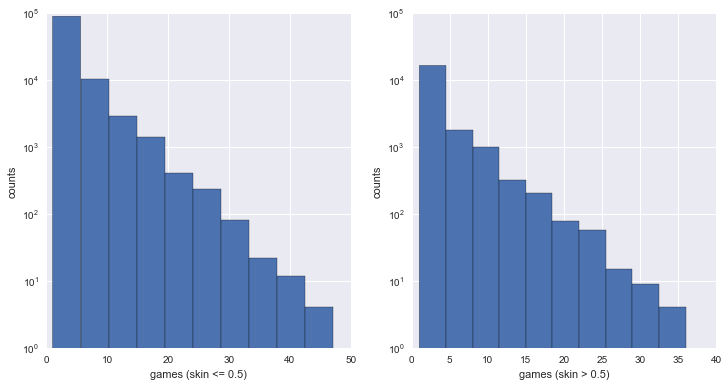

In [58]:
plt.subplot(1,2,1)
plt.hist(data[data.skinColor <= 0.5].games)
plt.gca().set_xlabel('games (skin <= 0.5)')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.subplot(1,2,2)
plt.hist(data[data.skinColor > 0.5].games)
plt.gca().set_xlabel('games (skin > 0.5)')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.gcf().set_size_inches(12,6)

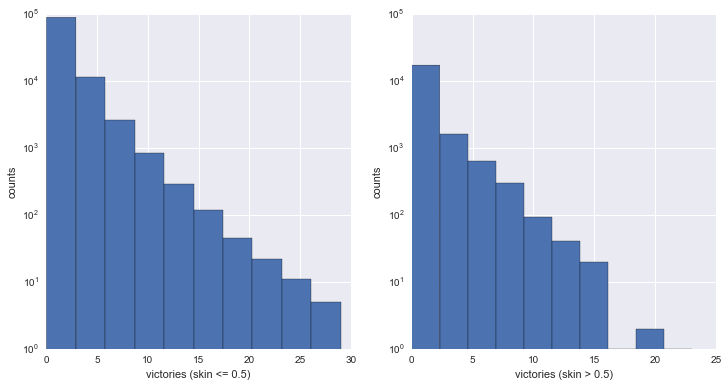

In [59]:
plt.subplot(1,2,1)
plt.hist(data[data.skinColor <= 0.5].victories)
plt.gca().set_xlabel('victories (skin <= 0.5)')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.subplot(1,2,2)
plt.hist(data[data.skinColor > 0.5].victories)
plt.gca().set_xlabel('victories (skin > 0.5)')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.gcf().set_size_inches(12,6)

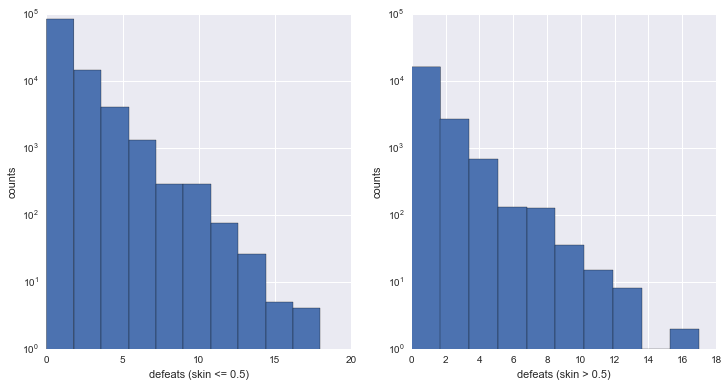

In [60]:
plt.subplot(1,2,1)
plt.hist(data[data.skinColor <= 0.5].defeats)
plt.gca().set_xlabel('defeats (skin <= 0.5)')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.subplot(1,2,2)
plt.hist(data[data.skinColor > 0.5].defeats)
plt.gca().set_xlabel('defeats (skin > 0.5)')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.gcf().set_size_inches(12,6)

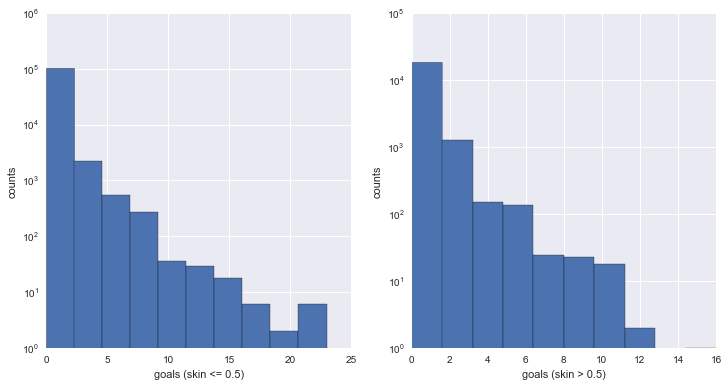

In [61]:
plt.subplot(1,2,1)
plt.hist(data[data.skinColor <= 0.5].goals)
plt.gca().set_xlabel('goals (skin <= 0.5)')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.subplot(1,2,2)
plt.hist(data[data.skinColor > 0.5].goals)
plt.gca().set_xlabel('goals (skin > 0.5)')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.gcf().set_size_inches(12,6)

We do not observe again significant differences, but something peculiar can be anyway noticed:
- white-race players have played more;
- there is no striking diversity in terms of victories (which are a bit more for white-race players) and defeats;
- white-race players seem to have signed more goals, that is, if a player has done the highest registered number of goals when meeting a certain referee, he is probably a white-skin player.

These results are of course due to the **skin color distribution** (white-race players are more than black-race ones, so that the volumes are higher and the probabilities may increase), so we cannot expect too much from this set of statistics in terms of discriminative power.

We concentrate now on the racial statistics:

In [72]:
# NaN identification
#data.refNum.isnull().value_counts()/len(data)*100
#data.refNum.isnull().value_counts()/len(data)*100
# one can check that the two parameters are perfectly defined

data.meanIAT.isnull().value_counts()/len(data)*100
#data.nIAT.isnull().value_counts()/len(data)*100
#data.seIAT.isnull().value_counts()/len(data)*100

False    99.877228
True      0.122772
Name: meanIAT, dtype: float64

One can check easily that the implicit association test scores are not defined for the same dyads, which constitute the 0.12% of the total amount. Being this quantity negligible, we replace the missing values with the mean of the dataset (probably this problem is due to the absence of a IAT score for certain Countries where the referees come from):

In [73]:
data = data.fillna({'meanIAT' : np.mean(data.meanIAT), 'nIAT' : np.mean(data.nIAT), 'seIAT' : np.mean(data.seIAT)})

In [77]:
data.meanExp.isnull().value_counts()/len(data)*100
#data.nExp.isnull().value_counts()/len(data)*100
#data.seExp.isnull().value_counts()/len(data)*100

False    99.877228
True      0.122772
Name: meanExp, dtype: float64

The explicit association tests give the same problem for the same rows; we proceed as above:

In [78]:
data = data.fillna({'meanExp' : np.mean(data.meanExp), 'nExp' : np.mean(data.nExp), 'seExp' : np.mean(data.seExp)})

We remind that high values of *meanIAT* and *meanExp* (in absolute value) express evaluation bias in favour of whites against blacks, in reference to the Country the referee comes from. Negative values stand for the opposite tendency.

Let us now take a look at the corresponding distributions for the mean scores only (for the sake of brevity):

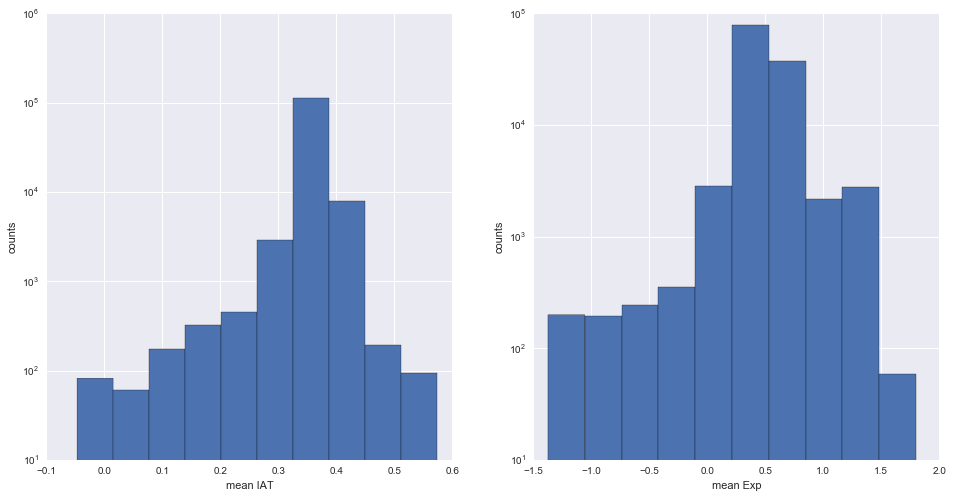

In [80]:
plt.subplot(1,2,1)
plt.hist(data.meanIAT)
plt.gca().set_xlabel('mean IAT')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.subplot(1,2,2)
plt.hist(data.meanExp)
plt.gca().set_xlabel('mean Exp')
plt.gca().set_ylabel('counts')
plt.gca().set_yscale('log')

plt.gcf().set_size_inches(16,8)

We notice that the peaks of the distributions are comparable (notice that the x-scaling is different), but the range of *meanExp* is broader:

In [84]:
print('Mean standard error ratio between IAT and Exp: ' + str(np.mean(data.seExp)/np.mean(data.seIAT)))

Mean standard error ratio between IAT and Exp: 4.751544110246294


We summarize then some relevant expectations about the possible behaviour of the classifier:
1. **Taller** players are more likely to play in the **English** or **German** League;
2. Players with the **lowest skin factors** are more likely to play in the **English** or **German** League as well;
3. Players with the **highest skin factors** are more likely to play in the **English** or **French** League;
4. Players with the **highest** numbers of assigned **yellow cards** are more likely to have **low** skin factors.

We remind that the performed analysis is merely qualitative and not exhaustive, as we did not consider the other features of the dataset. For the sake of brevity, we chose only some "more stricking" features and tried to investigate the behaviour of the data in relation to this subset. Our next goal is now to define a *Random Forest Classifier* to predict the skin factor.

# Data splitting

We divide the dataset into training, validation and test subsets with the classical scheme **60-20-20**, using a generator of random numbers for the splitting:

In [152]:
# define the random sampling for training, validation and test subsets of the dataframe
import random
length = len(data) # data length for random sampling
training_length = int(round(0.6*length))
validation_length = int(round(0.2*length))

training_index = random.sample(list(data.index),training_length) # random sampling from the entire dataset
training_index.sort()
no_train_index = set(list(data.index))-set(training_index) # get the remaining indexes

validation_index = random.sample(no_train_index,validation_length) # random sampling for the validation dataset
validation_index.sort()

test_index = list(set(no_train_index)-set(validation_index)) # assign the remaining indexes for the test
test_index.sort()
# Notice that this scheme ensures consistency with the dataset length (no overflow due to roundings)

Now we define and save the data subsets in csv format for further analysis:

In [159]:
training = data.loc[training_index]

validation = data.loc[validation_index]

test = data.loc[test_index]

In [160]:
training.to_csv('training.csv',encoding='utf-8')
validation.to_csv('validation.csv',encoding='utf-8')
test.to_csv('test.csv',encoding='utf-8')

# From data to numbers: NaN treatment

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

training = pd.read_csv('training.csv')
# delete the Unnamed column
del training['Unnamed: 0']

In [87]:
training.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skinColor,leagueID
0,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,0
1,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250,0
2,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,Right Fullback,2,2,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000,3
3,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,Left Winger,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.500,0
4,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,Center Back,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000,2


At this point we must deal with a matrix-like dataset to let the Random Forest act on our training set. Our goal is then to convert any information in the dataset into a numeric datum (more specifically, the format is *np.float32*; check [here](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more). we have already defined a dictionary to treat the league Country numerically; we will perform the same convertion for the other features. Notice that each attribute in the dataset has *non-unique* elements, so that we must at first select realizations without repetitions and convert them into floating point numbers.

In [147]:
# convert players into numbers
players = list(training.playerShort.value_counts().index) # get the index from the method value_counts() for unicity
players_ID = {} #define dictionary
for p in range(len(players)):
    players_ID[players[p]]=p

In [148]:
# convert clubs into numbers
clubs = list(training.club.value_counts().index)
clubs_ID = {}
for p in range(len(clubs)):
    clubs_ID[clubs[p]]=p

Observe that the attributes *height*, *weight* and *position* contain NaN values:

In [149]:
training.height.isnull().value_counts()/len(training)*100.0

False    99.958541
True      0.041459
Name: height, dtype: float64

In [150]:
training.weight.isnull().value_counts()/len(training)*100.0

False    99.395504
True      0.604496
Name: weight, dtype: float64

In [151]:
training.position.isnull().value_counts()/len(training)*100.0

False    93.345191
True      6.654809
Name: position, dtype: float64

Since for *height* and *weight* we have respective NaNs percentages of 0.04% and 0.60%, we can replace NaNs with the mean value of the dataset without perturbing it too significantly.

Now we replace NaN values for weight, height with the means of the respective attributes:

In [152]:
training = training.fillna({'weight' : np.mean(training.weight), 'height' : np.mean(training.height)})

As far as the *position* is concerned, there is a higher NaNs percentage (~6.7%). We take a look at the positions occurrences:

In [153]:
training.position.value_counts()/len(training)

Center Back             0.166036
Center Forward          0.135704
Defensive Midfielder    0.111698
Goalkeeper              0.087946
Attacking Midfielder    0.086636
Left Fullback           0.072994
Right Fullback          0.068420
Left Midfielder         0.049670
Right Winger            0.041258
Center Midfielder       0.038918
Right Midfielder        0.037286
Left Winger             0.036885
Name: position, dtype: float64

This shows that there is no dominant position, which is of course reasonable. This makes then NaN replacement a bit more tricky and subjective, due to the fact that the datum is not numeric in this case. To reduce the amount of null values, we can try for instance to look if there is some player with more occurrencies in the dataset: assuming that he does not change role, we may replace the NaN value with its own role given by other rows in the dataframe:

In [154]:
set(training[training.position.isnull()].playerShort) & set(training[training.position.notnull()].playerShort)

set()

Given that the intersection of the name sets is empty, this strategy does not work. However, we convert the position labels into numeric format for eventual usage. One way to deal with consistent data without perturbing the dataset is to fill in the NaN values with a valid position picked up among the available ones with the same statistical distribution of the parameter (in other words, we sample the data itself following its empirical probability density function). We perform this operation quite roughly, tranforming probabilities into frequencies and without using pseudo-random number generators. Notice that we *rescale all the frequencies on the nonnull component of the data* before doing splitting:

In [155]:
positions = list(training.position.value_counts().index)
positions_ID = {}
for p in range(len(positions)):
    positions_ID[positions[p]]=p

In [156]:
training.position.value_counts()/training.position.isnull().value_counts()[False]

Center Back             0.177873
Center Forward          0.145379
Defensive Midfielder    0.119661
Goalkeeper              0.094216
Attacking Midfielder    0.092812
Left Fullback           0.078198
Right Fullback          0.073298
Left Midfielder         0.053211
Right Winger            0.044200
Center Midfielder       0.041692
Right Midfielder        0.039944
Left Winger             0.039515
Name: position, dtype: float64

In [157]:
freq = training.position.value_counts()/training.position.isnull().value_counts()[False]
length_nan = training.position.isnull().value_counts()
length_nan = length_nan[True]

portions = []
for pos in positions[:len(positions)-1]:
    portions.append(int(round(length_nan*freq[pos])))
portions.append(length_nan-np.sum(portions) )
portions

[885, 723, 595, 469, 462, 389, 365, 265, 220, 207, 199, 197]

Now we cover the NaN positions with any position as many times as prescribed by the vector *portions*:

In [ ]:
#define the cumulative sum of 'portions' for simplicity
cum_portions = np.cumsum(portions)
cum_portions

# TO BE ADJUSTED
nan_indices = training[training.position.isnull()].index
for pos in range(len(portions)):
    for num in range(portions[pos]):
        training.loc[nan_indices[cum_portions[pos]+num]].position=positions[pos]

C:\Users\Utente\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
training.position.isnull().value_counts()

In [97]:
training.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skinColor,leagueID
0,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,0
1,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250,0
2,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,Right Fullback,2,2,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000,3
3,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,Left Winger,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.500,0
4,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,Center Back,1,1,...,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000,2


# From data to numbers: model matrix

Since we have mapped into numerical codes all the parameter we found interesting for our predictions, we can define a matrix which acts as the numerical counterpart of the dataframe. We choose to discard the following attributes from the beginning:
- *photoID* (not significant)
- *Alpha_3* (already mapped by refCountry)
- *player* (already mapped by playerShort)
- *leagueCountry* (already mapped by leagueID, added at the beginning to the dataframe)

By now we keep the parameter *position*, which contains several NaN values, and consider the mean of *rater1* and *rater2* as the response variable. With these premises we instantiate the model matrix *X*; at first we extract all the relevant features from the dataframe:

In [98]:
# players
player = []
for l in training.playerShort:
    player.append(players_ID[l])

# clubs
club = []
for l in training.club:
    club.append(clubs_ID[l])

# leagues
league = list(training.leagueID)

# height and weight
height = list(training.height)
weight = list(training.weight)

# position (deal with care!)
position = list(training.position)
for l in training.position:
    position.append(positions_ID[l])

# games, victories, defeats, goals, cards
games = list(training.games)
victories = list(training.victories)
defeats = list(training.defeats)
goals = list(training.goals)
yellowCards = list(training.yellowCards)
redCards = list(training.redCards)
yellowReds = list(training.yellowReds)

# skin rating (RESPONSE variable)
skin = list(training.skinColor)

# referee parameters
refNum = list(training.refNum)
refCountry = list(training.refCountry)

# statistical parameters for skin rating distortion factors
meanIAT = list(training.meanIAT)
nIAT = list(training.nIAT)
seIAT = list(training.seIAT)
meanExp = list(training.meanExp)
nExp = list(training.nExp)
seExp = list(training.seExp)

KeyError: nan

Now we define the model matrix *X* through appending and reshaping:

In [35]:
n = len(training) # length of dataframe: dimension of response vector
m = 22 # number of features: 21 predictors + response variable

X0 = skin + player + club + league + height + weight + position + games + victories + defeats + goals + yellowCards + redCards + yellowReds + refNum + refCountry + meanIAT + nIAT + seIAT + meanExp + nExp + seExp

shape = (n,m)
X = np.array(X0)
X.shape = shape

At this point we are ready to run the model on the matrix X.

We begin importing the needed modules from the scikit-learn library and defining a suitable Random Forest Classifier. We will use the Information Gain (Wikipedia description [here](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees)), which is based on the concept of information ***[entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))***. By now we choose the number of decision trees to be 10 (default value). Another selection criterion which may be used is the *[Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)*.

In [3]:
import sklearn.ensemble as sklrn
randomForest = sklrn.RandomForestClassifier(criterion='entropy')